### Computer Science: Fast Fourier Transform (FFT), one-dimensional, from scratch in Python
###### by Hamed Shah-Hosseini
Explanation in English: https://www.pinterest.com/HamedShahHosseini/
<br>Explanation in Persian: https://www.instagram.com/words.persian
<br> Python code at: https://github.com/ostad-ai/Computer-Science

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import ceil

In [2]:
# DFT, 1D
def dft(f):
    N=f.shape[0]
    F=np.zeros_like(f,dtype='complex')
    for u in range(N):
        F[u]=np.sum(f*np.exp(-1j*2*np.pi*u*np.arange(N)/float(N)))
    return F

# Inverse DFT, 1D
def idft(F):
    N=F.shape[0]
    f=np.zeros_like(F)
    for x in range(N):
        f[x]=np.sum(F*np.exp(1j*2*np.pi*x*np.arange(N)/float(N)))
    return f/float(N)

# shifting the DFT, 1D or FFT, 1D to the center 
# such that zero-frequency component is at the center
def dftshift(f):
    N=len(f)
    fc=f.copy()
    for x in range(N):
        sign=x%2
        if sign==1:
            fc[x]=-fc[x]
    return fc

# recursive FFT
def fft(f):
    N = len(f)    
    if N == 1:
        return f
    else:
        F_even = fft(f[::2])
        F_odd = fft(f[1::2])
        W_N = np.exp(-2j*np.pi*np.arange(N//2)/ N)
        F = np.concatenate((F_even+W_N*F_odd,
              F_even-W_N*F_odd))
        return F

#recursive inverse FFT
def ifft(F):
    N = len(F)    
    if N == 1:
        return F
    else:
        f_even = ifft(F[::2])
        f_odd = ifft(F[1::2])
        W_N = np.exp(2j*np.pi*np.arange(N//2)/ N)
        f = np.concatenate((f_even+W_N*f_odd,
             f_even-W_N*f_odd))
        return f

In [3]:
# Fast Fourier Transform, 1D
# number of samples is extended 
# to nearest 2^p, if necessary 
def FFT(f):
    fc=f.copy()
    p=ceil(np.log2(len(fc)))
    len_p=2**p
    if len_p>len(fc):    
        fc.resize(len_p)
    return fft(fc)

# Inverse FFT, 1D
def IFFT(f):
    return ifft(f)/len(f)

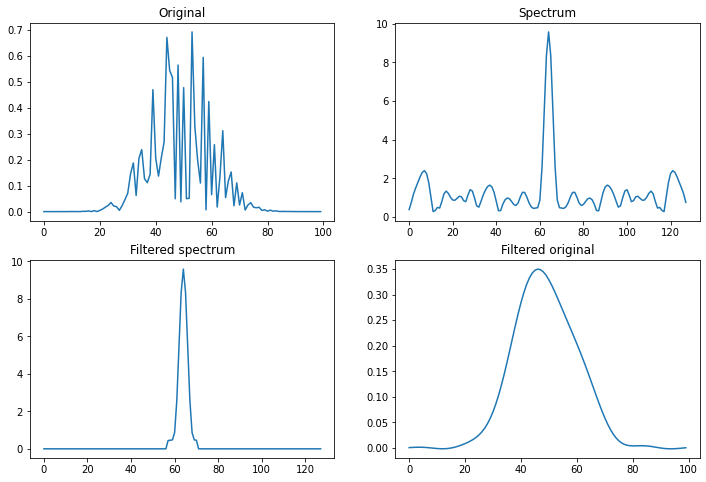

In [10]:
# example of low-pass filtering in Frequency domain
# to remove noise
xs=np.linspace(-5.,5.,100)
f=np.random.rand(len(xs))*np.exp(-xs**2/2)
F=FFT(dftshift(f))
F_filtered=F.copy()
F_filtered[:57]=0; F_filtered[-57:]=0
plt.figure(figsize=(12,8))
plt.subplot(221); plt.title('Original')
plt.plot(f)
plt.subplot(222); plt.title('Spectrum')
plt.plot(np.abs(F))
plt.subplot(223);plt.title('Filtered spectrum')
plt.plot(np.abs(F_filtered))
plt.subplot(224);plt.title('Filtered original')
plt.plot(dftshift(IFFT(F_filtered)).real[:len(f)])
plt.show()

In [5]:
# comparing FFT and DFT for a short signal
# to see if they recover the original signal
f=np.array([1,2,3,4,5])
IFFT(FFT(f)).real,idft(dft(f)).real

(array([1., 2., 3., 4., 5., 0., 0., 0.]), array([1., 2., 3., 4., 5.]))

In [6]:
#checking the correctnss of dft with that of numpy
np.allclose(np.fft.fft(f),dft(f))

True

In [7]:
# to compare performance of DFT versus FFT
# we define a signal with 2000 samples
xs=np.linspace(-5.,5.,2000)
f=np.random.rand(len(xs))*np.exp(-xs**2/2)

In [8]:
%timeit dft(f) 

802 ms ± 5.41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%timeit FFT(f)

58.5 ms ± 943 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
